A program that reads and processes images for a Random Forest Classifier to classify as images as good, blacked-out, saturated, or blurry.

In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import pickle

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models
os.getcwd()

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


'C:\\Users\\micha\\github\\uav-image-analysis\\methods'

In [2]:
# Create dataframe from test-images.csv image names and labels
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images.csv')
# Set path to training/test image folders
paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/*MEDIA/'
# Read data from image files
train_images, image_list = fit_models.read_images(paths)
y = np.array(df_train['Label'])
y = df_train['Label'].values
# Split data into 60% training images and 40% testing images
X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)
# Check to make sure data is read properly 
print(df_train.head())
print(X_train.shape)
print(y_train[0:5])

(431, 327680)
  Image Date     MEDIA Image_Name  Label
0  2/16/2019  100MEDIA   DJI_0001      2
1  2/16/2019  100MEDIA   DJI_0002      2
2  2/16/2019  100MEDIA   DJI_0003      2
3  2/16/2019  100MEDIA   DJI_0004      2
4  2/16/2019  100MEDIA   DJI_0005      2
(258, 327680)
[0 0 0 0 0]


In [3]:
# Run random forest classifier
model = RandomForestClassifier()
# Train model and get model predictions and probabilities
model_logistic, probabilities, y_pred = fit_models.supervised_models(model, X_train, y_train, X_test, y_test)

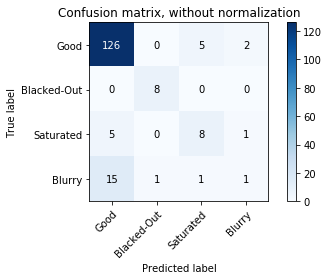

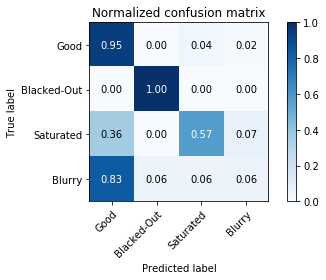

In [4]:
# Apply labels to classes
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']
# Set printing options
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [5]:
# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))